# Visualización

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
def apertura_exploracion(csv):

    """ Función para leer csv, convertir a df y hacer una primera exploración."""
    
    try:
        # Convertir el csv a DataFrame
        df = pd.read_csv(f"../files/{csv}.csv")        

        # Muestro las primeras filas
        display(df.head())

        # Obtengo las listas
        print(f"-----\n\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n-----")

        # Consulto si hay filas duplicadas
        print(f"\nEl número de filas duplicadas es {df.duplicated().sum()}\n-----")

        # Muestro el tipo de dato y si hay nulos por cada columna
        print("\nInformación del DataFrame:")
        df.info()

        # Muestro las estadísticas de columnas numéricas
        print("-----\n\nEstadísticas descriptivas:")
        display(df.describe().T)

        # Me devuelve un df que tendré que igualar a una variable
        return df  

    # Excepciones en caso de no enconrar el archivo o de que haya un error
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '../files/{csv}.csv'.")
        return None  
    
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None 
    

In [4]:
df = apertura_exploracion("Full Loyalty Program Clean Nonulls")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,Active
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,72421.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,Active
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,72421.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,Active
3,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN,Active
4,100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,54133.0,Married,Nova,7861.80,Standard,2013,2,NaN,NaN,Active


-----

El DataFrame tiene 207632 filas y 26 columnas.
-----

El número de filas duplicadas es 0
-----

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207632 entries, 0 to 207631
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               207632 non-null  int64  
 1   Year                         207632 non-null  int64  
 2   Month                        207632 non-null  int64  
 3   Flights Booked               207632 non-null  int64  
 4   Flights with Companions      207632 non-null  int64  
 5   Total Flights                207632 non-null  int64  
 6   Distance                     207632 non-null  int64  
 7   Points Accumulated           207632 non-null  float64
 8   Points Redeemed              207632 non-null  int64  
 9   Dollar Cost Points Redeemed  207632 non-null  int64  
 10  Country                      207632 non-null  

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.0,549240.808411,258456.999580,100018.00,326707.00,549612.00,772019.00,999986.00
Year,207632.0,2017.536295,0.498682,2017.00,2017.00,2018.00,2018.00,2018.00
Month,207632.0,6.641394,3.448752,1.00,4.00,7.00,10.00,12.00
Flights Booked,207632.0,8.039050,4.668948,1.00,4.00,8.00,11.00,21.00
Flights with Companions,207632.0,2.015706,2.538359,0.00,0.00,1.00,4.00,11.00
Total Flights,207632.0,10.054756,5.807808,1.00,6.00,10.00,14.00,32.00
Distance,207632.0,2361.633876,1135.835170,90.00,1458.00,2298.00,3150.00,6293.00
Points Accumulated,207632.0,241.642600,116.118272,9.00,149.00,235.00,323.00,676.50
Points Redeemed,207632.0,59.968540,170.314671,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,207632.0,4.853655,13.775511,0.00,0.00,0.00,0.00,71.00


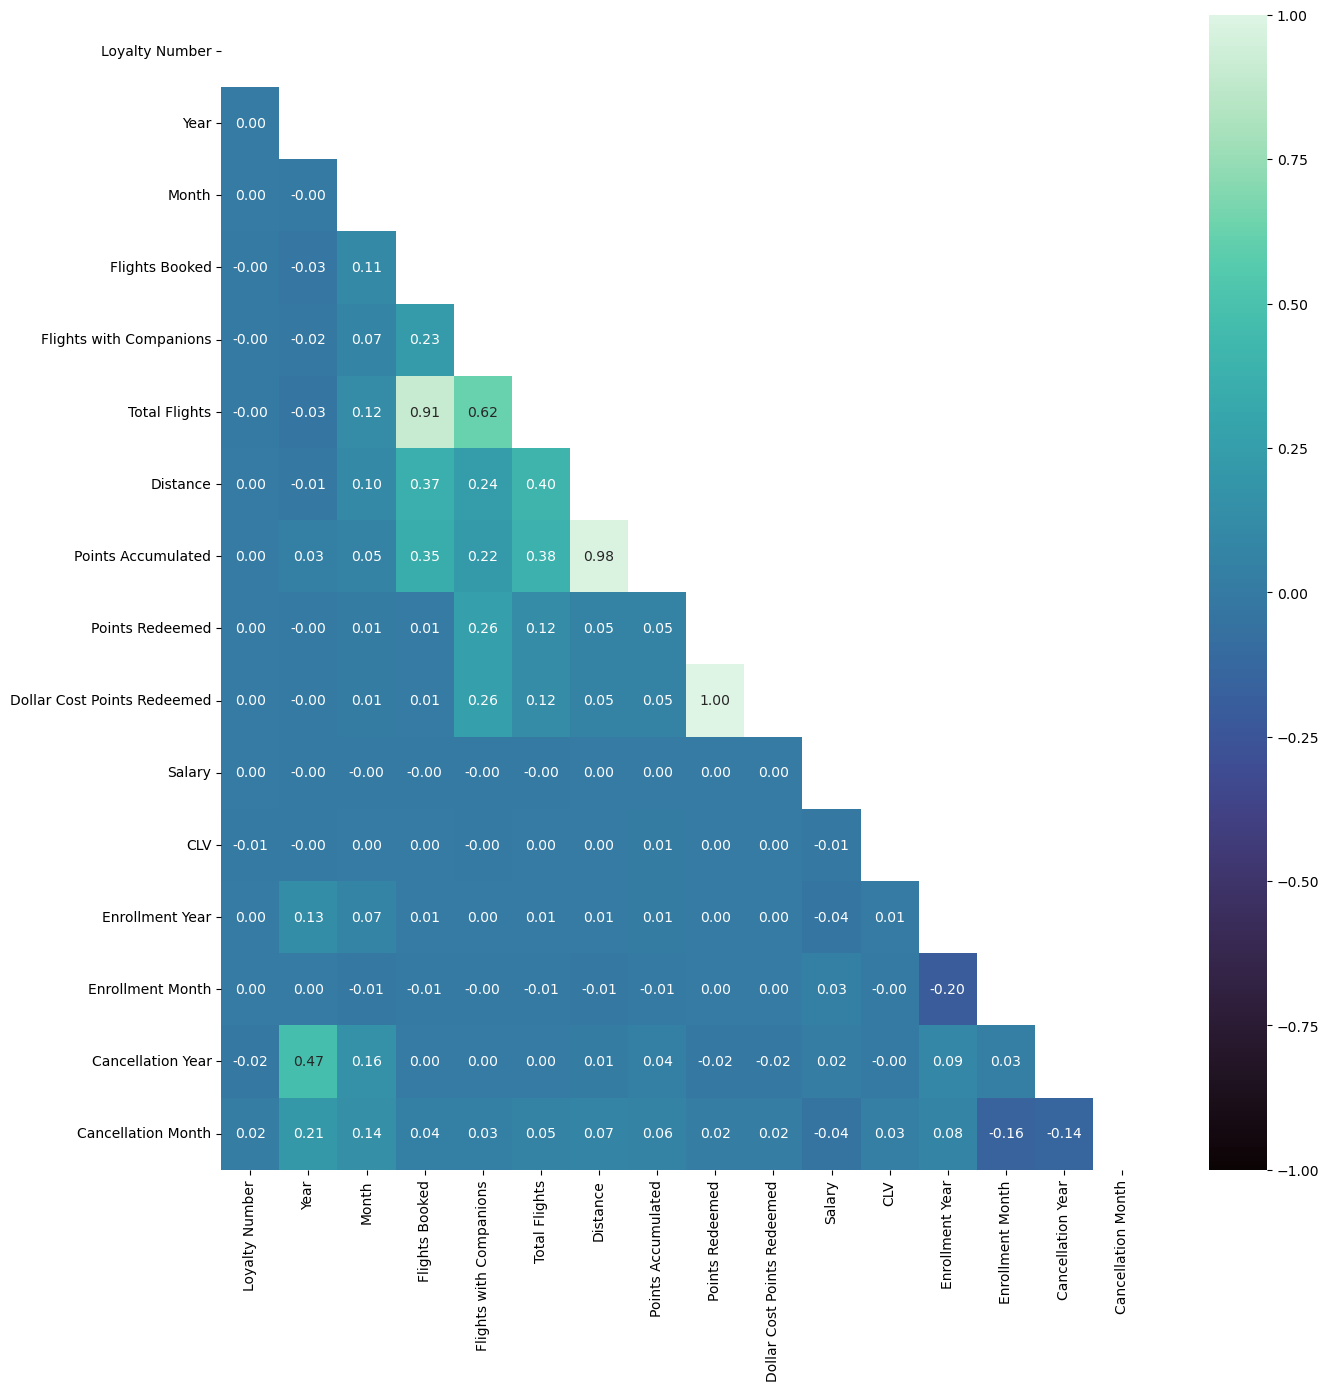

In [5]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize = (15, 15))


mask = np.triu(np.ones_like(correlacion, dtype=bool))
# creamos un heatmap con la máscara correlación
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1,
            mask = mask)
plt.savefig("../images/01_correlacion.jpg", format="jpg", dpi=300, bbox_inches="tight");

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Vemos que los meses en los que más vuelos se reservan son los que coinciden con el periódo vacacional:
- sobretodo junio, julio y agosto
- el sigue diciembre 
- y después mayo y marzo

Cuando introducimos la variable año, comparando los meses por año, vemos que la tendencia se mantiene en cuanto a los meses estivos y diciembre, pero que sin embargo, la reserva de vuelos en 2017 a partir del mes de mayo, fue menor respecto al año 2018.

In [6]:
# Realizo una agrupación previa sumando los vuelos reservados por mes
vuelos_mes = df.groupby("Month")["Flights Booked"].sum().reset_index()
vuelos_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


In [7]:
# Realizo una agrupación previa sumando los vuelos reservados por mes y año
vuelos_mes_año = df.groupby(["Month","Year"])["Flights Booked"].sum().sort_index().reset_index()
vuelos_mes_año

,Month,Year,Flights Booked
0,1,2017,47766
1,1,2018,49170
2,2,2017,47691
3,2,2018,48643
4,3,2017,64271
5,3,2018,66928
6,4,2017,55720
7,4,2018,56791
8,5,2017,65279
9,5,2018,76891


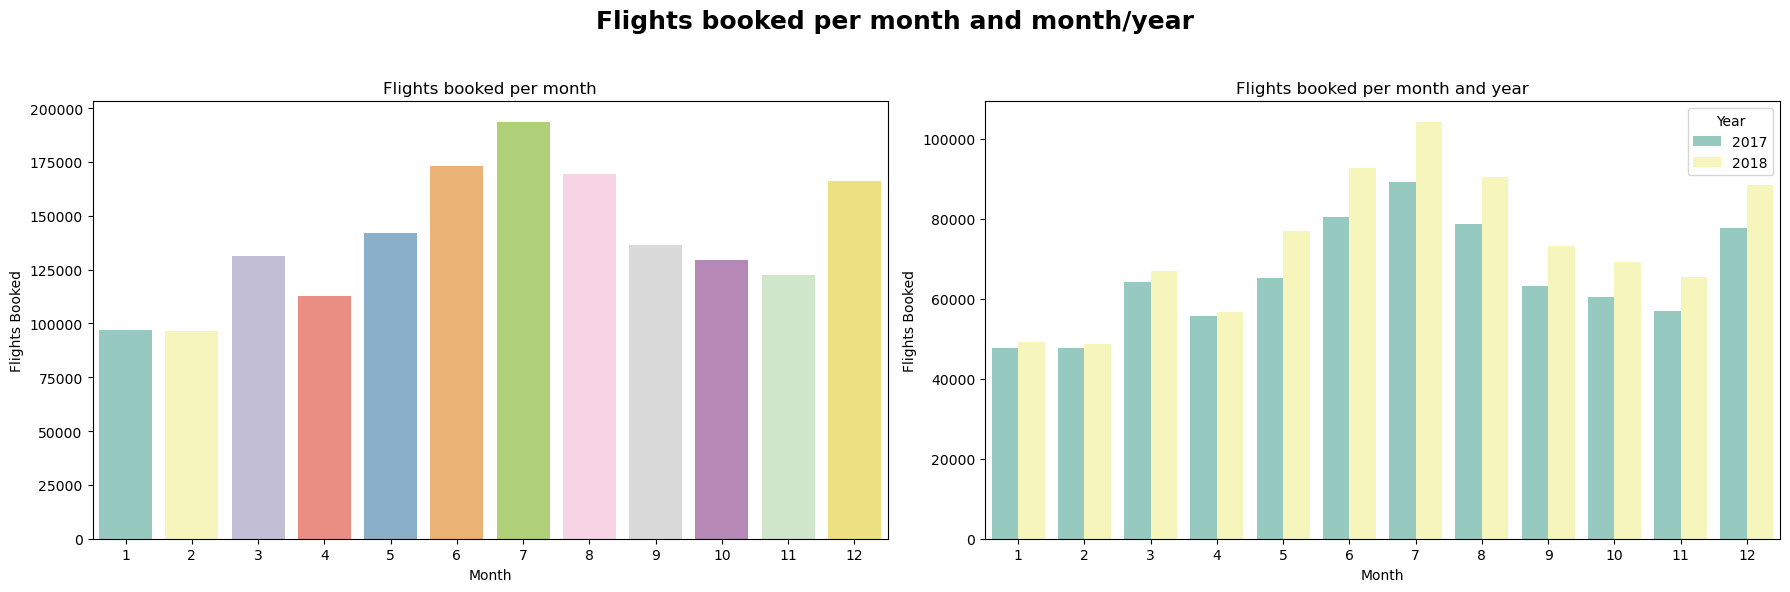

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
fig.suptitle("Flights booked per month and month/year", fontsize=18, fontweight="bold")

# Gráfico 1: Vuelos por mes
sns.barplot(y="Flights Booked",
            x="Month", 
            data= vuelos_mes,
            hue="Month",
            ax=axes[0],
            palette="Set3")
axes[0].set_title("Flights booked per month")
axes[0].legend().remove()


# Gráfico 2: Vuelos por mes y año
sns.barplot(data=vuelos_mes_año, 
             x="Month", 
             y="Flights Booked", 
             hue="Year", 
             ax=axes[1], 
             palette="Set3")
axes[1].set_title("Flights booked per month and year")


plt.tight_layout(rect=[0, 0, 1, 0.95])
# La imagen se queda comentada para que no se genere cada vez
# plt.savefig("../images/02_flights_booked_per_month_and_month&year.jpg", format="jpg", dpi=300, bbox_inches="tight");

## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

- Consultando la correlación, podemos ver que existe una alta relacion (0.98) entre las variables "Points Accumulated" y "Distance".

- Mirando el gráfico vemos una clara relación lineal positiva, cuanto más distancia se recorre más puntos se consiguen.

- Y viendo como los datos están distribuidos en cuatro lineas claras, podríamos decir que cuanta más distancia se recorre en menor tiempo, más rápidamente se acumulan los puntos.

Text(0.5, 1.0, 'Points accumulated per distance')

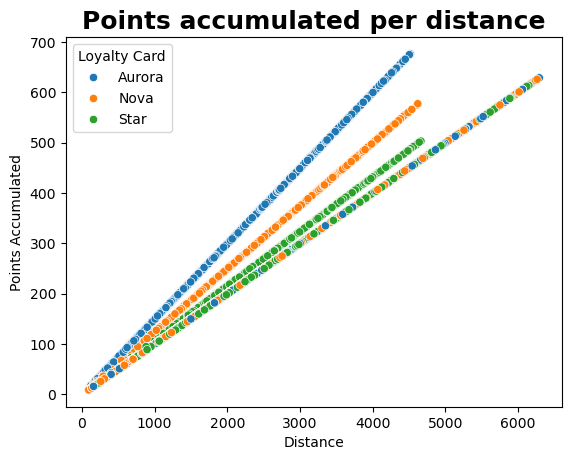

In [12]:
# gráfica para ver el total de puntos acumulados por distancias recorridas
sns.scatterplot(y="Points Accumulated",
            x="Distance", 
            data=df,#muestra la relación,
            hue= "Loyalty Card")


plt.title("Points accumulated per distance", fontsize=18, fontweight="bold")
#plt.savefig("../images/03_points_accum_per_distance.jpg", format="jpg", dpi=300, bbox_inches="tight");


## ¿Cuál es la distribución de los clientes por provincia o estado?

Filtrando el data frame para quedarnos con el cliente una única vez y grupando los clientes por provincia, podemos ver que: 
- Prince Edward Island y Yukon son las provincias con menor número de clientes
- Ontario es la provincia con mayor numero de clientes
- Seguido por British Clumbia y Quebec
- Las tres primeras se diferencian bastante de la cuarta que es Alberta

Cuando trasladamos a una gráfica los datos de actividad por provincia, podemos ver que: 
- Las provincias con mayor actividad también coinciden con las de mayor numero de clientes
- También exite una gran diferencia entre los tres primeros puestos y la cuarta provincia con mayor actividad


In [15]:
# miro las filas totales del df
df.shape 

(207632, 26)

In [16]:
# miro los valores unicos de "Loyalty Number"
df["Loyalty Number"].nunique()

15236

In [17]:
# creo un df nuevo donde solo me aparezcan los clientes 1 vez, sin estar duplicados
# este df lo utilizaré tabién en las próximas gráficas
df_clientes_unicos = df.drop_duplicates(subset="Loyalty Number")
df_clientes_unicos.shape

(15236, 26)

In [18]:
# agrupo manualmente para ver los resultados
df_clientes_unicos.groupby("Province").count()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Status
Province,,,,,,,,,,,,,,,,,,,,,,,,,
Alberta,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,879,65,65,879
British Columbia,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,274,274,4019
Manitoba,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,55,55,590
New Brunswick,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585,35,35,585
Newfoundland,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,21,21,230
Nova Scotia,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,28,28,467
Ontario,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,4932,379,379,4932
Prince Edward Island,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,5,5,56
Quebec,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,3002,231,231,3002


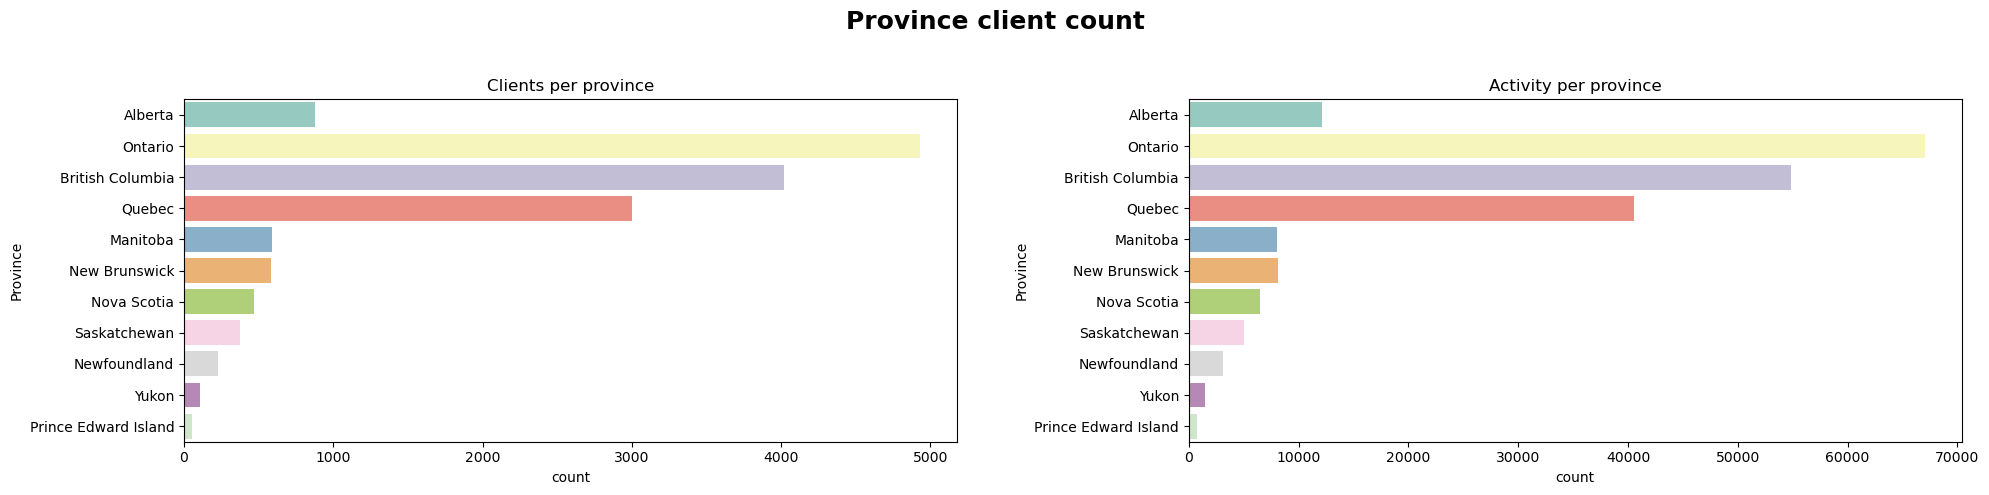

In [ ]:
# creo dos gráficas: 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Province client count", 
             fontsize=18, fontweight="bold")


# una en la que cojo el df que acabo de crear, donde los clientes solo aparecen una vez
sns.countplot(y="Province", 
            data=df_clientes_unicos,
            ax=axes[0],
            hue="Province",
            palette="Set3")
axes[0].set_title("Clients per province")

# otro con el df en el que los clienets aparecen cada vez que vuelan
sns.countplot(y="Province", 
            data=df,
            ax=axes[1], 
            hue= "Province",
            palette="Set3")
axes[1].set_title("Activity per province")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
#plt.savefig("../images/05_province_client_count.jpg", format="jpg", dpi=300, bbox_inches="tight")


## ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Creamos una gráfica para ver la distribución de clientes según el nivel educativo.

Creamos una gráfica donde se muestre la media de Salary por nivel educativo, en ella podemos ver:
- "Doctor" tiene el salario medio más alto con diferencia respecto al segundo.
- "Master" es el segundo salario medio más alto
- Las demás categorías, tienen un salario medio mucho menor

In [ ]:
# Variable con los tipos de educación y el conteo 
educacion = df_clientes_unicos["Education"].value_counts().sort_index(ascending=True)
educacion

Education
Bachelor                9517
College                 3888
Doctor                   655
High School or Below     707
Master                   469
Name: count, dtype: int64

In [ ]:
# df agrupando por Educación y sacando la media de Salario
salario_educacion = round(df.groupby("Education")["Salary"].mean(),2)
# Sort_index() para que me ordene alfabeticamente, igual que arriba, 
# así después las variables saldran del mismo color
salario_educacion = salario_educacion.sort_index(ascending=True).reset_index()
salario_educacion

,Education,Salary
0,Bachelor,72880.09
1,College,72421.00
2,Doctor,177991.68
3,High School or Below,60804.66
4,Master,103607.97


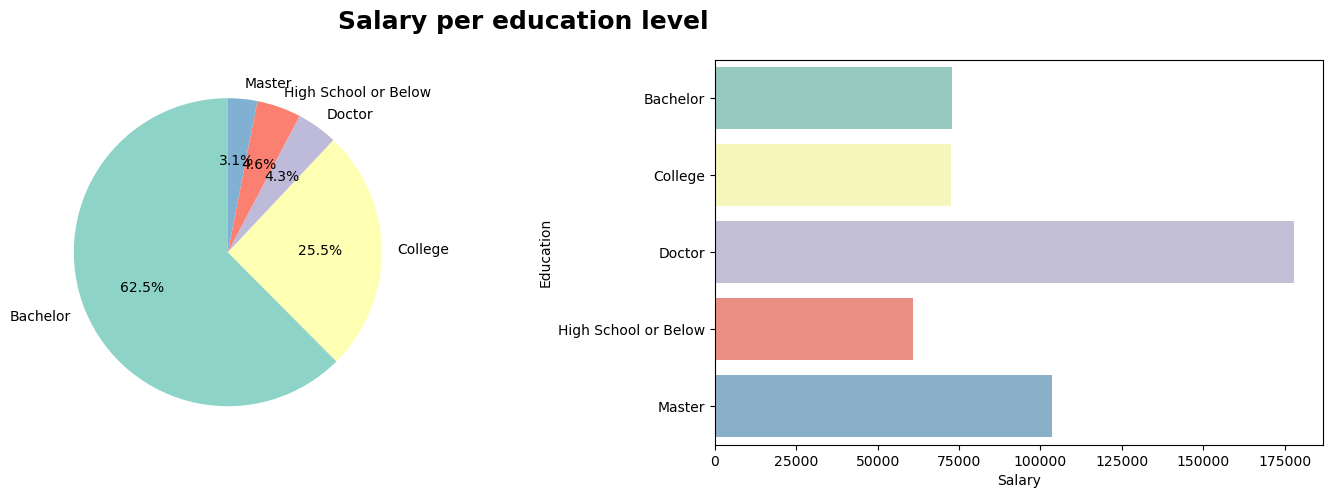

In [167]:
# dos gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Salary per education level", 
             fontsize=18, fontweight="bold")

# distribución por categorías en educación
axes[0].pie(educacion,
            labels=educacion.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("Set3"))

# salario medio por nivel educativo
sns.barplot(y="Education",
            x="Salary", 
            data=salario_educacion,
            ax=axes[1],
            hue="Education",
            palette="Set3")

plt.tight_layout(rect=[1, 3, 2, 0.95])
plt.subplots_adjust(left=0.2, wspace=0.3)
#plt.savefig("../images/06_salary_per_education_level.jpg", format="jpg", dpi=300, bbox_inches="tight")


## ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Generamos dos gráficos distinto, 

- Uno para ver el porcentaje de clientes por tipo de carta de fidelidad
- Otro para ver el conteo por tipo de carte de fidelidad

De ello podemos concluir que:

- Star tiene el mayor número de clientes, seguido por Nova
- Aurora es el que tiene menor número de clientes

In [82]:
# variable con las categorías en "Loyalty Card"
tarjetas = df_clientes_unicos["Loyalty Card"].value_counts().sort_values(ascending=True)
tarjetas

Loyalty Card
Aurora    3112
Nova      5151
Star      6973
Name: count, dtype: int64

In [42]:
# Agrupamos por categorías de "Loyalty Card" y contamos la cantidad de clientes
df_clientes_unicos.groupby("Loyalty Card").count()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Status
Loyalty Card,,,,,,,,,,,,,,,,,,,,,,,,,
Aurora,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,3112,243,243,3112
Nova,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,400,400,5151
Star,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,486,486,6973


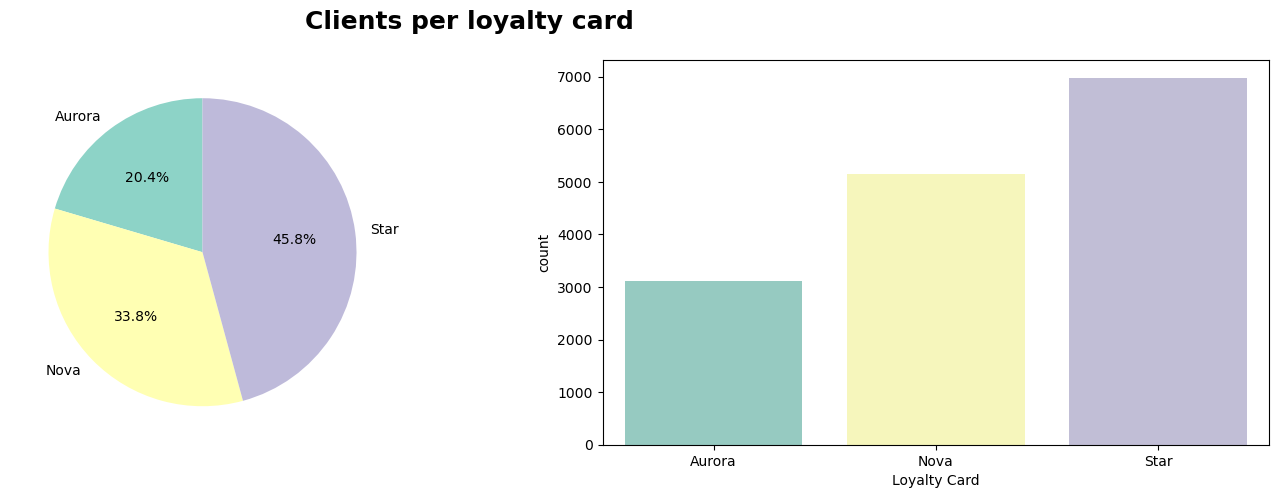

In [170]:
# creamos dos gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Clients per loyalty card", 
             fontsize=18, fontweight="bold")

# Porcentaje de clientes según el tipo de tarjeta
axes[0].pie(tarjetas,
            labels=tarjetas.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("Set3"))

# con un countplot
sns.countplot(x="Loyalty Card", 
            data=df_clientes_unicos,
            ax=axes[1],
            hue="Loyalty Card",
            palette="Set3")


plt.tight_layout(rect=[0, 3, 0, 0.95])
plt.subplots_adjust(left=0.2, wspace=0.1)
#plt.savefig("../images/07_clients_per_loyalty_card.jpg", format="jpg", dpi=300, bbox_inches="tight")

## ¿Cómo se distribuyen los clientes según su estado civil y género?

Generamos tres gráficos:
- Para ver la distribución de los clientes por sexo
- Para ver la distribución de los clientes por estado civil
- Un tercero combiando ambos, sexo y estado civil

De ello concluimos que:
- La proporción de clientes por sexo es similar, ligeramente más alto en mujeres, lo que es normal por la misma proporción que existe en el mundo.
- Casi el 60% de la clientela está casada, el 27% soltera y solo un 15% divorciada.
- Cuando comparamos ambas variables, vemos que el sexo no supone una variable que influya en la distribución de clientes, sin embargo, si podemos ver como la mayoría de los clientes están casados, siendo la proporcion y hombres y mujeres casi igual

In [ ]:
# Agrupo por sexo y estado civil y cuento
genero_civil = df_clientes_unicos.groupby(["Marital Status", "Gender"]).count().reset_index()
genero_civil

,Marital Status,Gender,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Status
0,Divorced,Female,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,1154,79,79,1154
1,Divorced,Male,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,81,81,1151
2,Married,Female,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,320,320,4401
3,Married,Male,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,4423,319,319,4423
4,Single,Female,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,157,157,2073
5,Single,Male,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,173,173,2034


In [61]:
# categorías de sexo
genero = df_clientes_unicos["Gender"].value_counts()
genero


Gender
Female    7628
Male      7608
Name: count, dtype: int64

In [60]:
# categorías de estado civil
estado_civil = df_clientes_unicos["Marital Status"].value_counts()
estado_civil

Marital Status
Married     8824
Single      4107
Divorced    2305
Name: count, dtype: int64

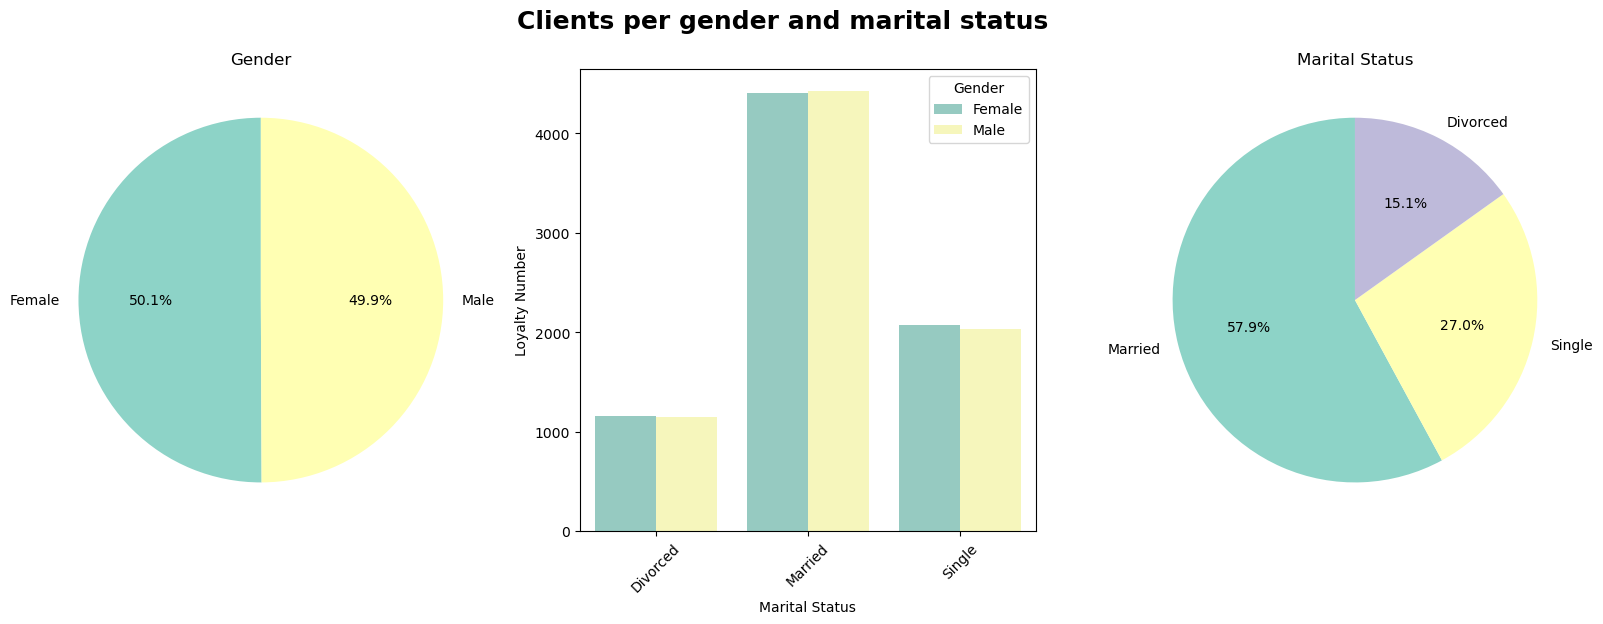

In [ ]:
# dtres gráficas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle("Clients per gender and marital status", fontsize=18, fontweight="bold")

# porcentaje por sexo
axes[0].pie(genero, 
            labels=genero.index, 
            autopct="%1.1f%%", 
            startangle=90, 
            colors=sns.color_palette("Set3"))
axes[0].set_title("Gender")

# combinando sexo y estado civil
sns.barplot(data=genero_civil, 
            x="Marital Status", 
            y="Loyalty Number", 
            hue="Gender", 
            ax=axes[1], 
            palette="Set3")
axes[1].tick_params(axis='x', rotation=45)

# porcentaje por estado civil
axes[2].pie(estado_civil, 
            labels=estado_civil.index, 
            autopct="%1.1f%%", 
            startangle=90, 
            colors=sns.color_palette("Set3"))
axes[2].set_title("Marital Status")

plt.tight_layout(rect=[1, 0, 1, 0.95])
#plt.savefig("../images/08_clients_per_gender_marital_status.jpg", format="jpg", dpi=300, bbox_inches="tight");